Plotting the scaling of https://github.com/rogerallen/iris performance

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
plt.style.use('ggplot')

In [2]:
# create a CSV file by hand from 'lein test' output
perf_df = pd.read_csv("data/thunder_iris.csv")
perf_df.head()

,date,logical cpu,jdk,clojure,type,parallelism,time (ms)
0,2016/01/20,8,1.8.0_72,1.6.0,512_cubes,1,9999.430526
1,2016/01/20,8,1.8.0_72,1.6.0,512_cubes,2,6112.124196
2,2016/01/20,8,1.8.0_72,1.6.0,512_cubes,3,4579.741014
3,2016/01/20,8,1.8.0_72,1.6.0,512_cubes,4,4390.740270
4,2016/01/20,8,1.8.0_72,1.6.0,512_cubes,6,3939.965605


In [7]:
def plot_em(sdfs,title):
    for i,k in enumerate(sorted(sdfs)):
        if i==0:
            ax=sdfs[k].plot(x="parallelism",
                            y="time (ms)",
                            label=k,
                            figsize=[16,8],
                            marker='+',
                            title=title)
            ax.set_xlabel("Parallelism")
            ax.set_ylabel("Render Time (ms)")
        else:
            sdfs[k].plot(x="parallelism",
                         y="time (ms)",
                         ax=ax,
                         label=k,
                         marker='+')
            
sf=perf_df[perf_df["type"]=="single_tri"] # select single tri
cu=perf_df[perf_df["type"]=="512_cubes"]  # select cubes

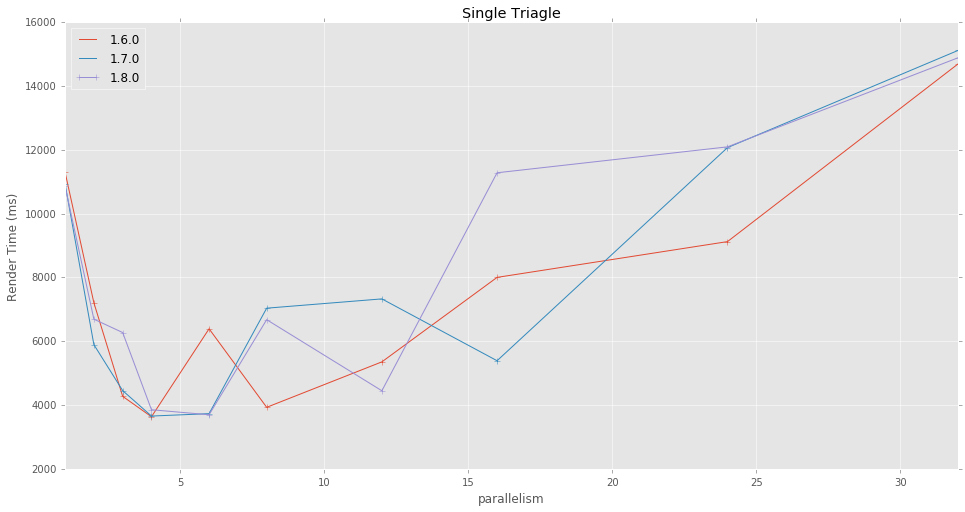

In [8]:
sdfs = {}
for v in ["1.6.0", "1.7.0", "1.8.0"]:
    sdfs[v]=sf[sf["clojure"]==v]
plot_em(sdfs,"Single Triagle")

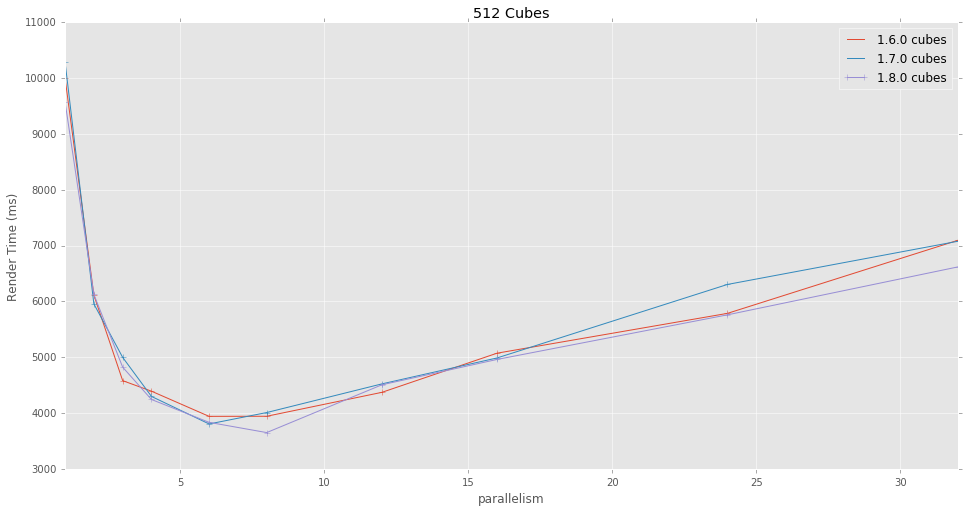

In [9]:
sdfs = {}
for v in ["1.6.0", "1.7.0", "1.8.0"]:
    sdfs[v+" cubes"]=cu[cu["clojure"]==v]
plot_em(sdfs,"512 Cubes")